# Example on CoherentBasis class

## Filippos Dakis  
Virginia Tech,   May 2024

Any feedback and suggestions are much appreciated!   dakisfilippos@vt.edu  
 
This script was developed with Python 3.11.9<br>
You should better execute the following sections one after the other, while reading the markdowns and also the inline code comments. In this way, you will understand the properties, the methods, and the capabilities of the CoherentBasis class.<br>

This notebook produces five figures:<br>
- Figure 1: photon number distribution for four deferent states written in the coherent basis<br>
- Figure 2: photon number distirbution for three different cat states <br>
- Figure 3: Wigner functions for (i) vacuum $|0\rangle$, (ii) coherent $|\alpha\rangle$,  (iii) superposition of two coherent states $|\alpha\rangle + |\beta\rangle$ <br>
- Figure 4: Wigner functions for (i) even cat state $|\mathcal{C}_+\rangle$, (ii) odd cat state $|\mathcal{C}_-\rangle$, (iii) compass cat state $\mathcal{C}$ <br>
- Figure 5: Q-Husimi functions for (i) even cat state $|\mathcal{C}_+\rangle$, (ii) odd cat state $|\mathcal{C}_-\rangle$, (iii) compass cat state $\mathcal{C}$ <br>

Version V 1.0.0

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import cm
import copy
import src.Library as lib
from src.CoherentBasis import CoherentBasis
from src.FockBasis import FockBasis

In the following set of sections we explore the basic CoherentBasis class features. <br>
<br>
Fist, let's see how to define simple state vectors using coherent states $|\alpha\rangle$ and then print them.

In [14]:

# Define your quantum states |psi_1⟩, |psi_2⟩ using coherent states
#
# Define the state  |psi_1⟩ = (2+2j)|1.5⟩
#
c1    = 2 + 2j                                          # coefficient in front of the \ket
s1    = 1.5                                             # argument inside the \ket
psi_1 = CoherentBasis(c1,s1)                            # |psi_1⟩ = c1|s1⟩,  here |1.5⟩ = |α = 1.5⟩ is a coherent state,  in general α ∈ Complex
# 
# Now let's print this state using   .print_state() method
#
print("Before normalization : ",psi_1.print_state('_1')[0],"\n")           # one variation of using  .print_state()
#
psi_1.normalize()                                       # nomalize the state
#
print("After normalization :   |ψ_1⟩ =",psi_1.print_state('')[1],"\n")     # another variation of using  .print_state()
#
norm  = psi_1.braket()                                  # compute ⟨ψ_1|ψ_1⟩
#
print("Also the norm of the state is:   ⟨ψ_1|ψ_1⟩ = ", lib.compact_complex(norm),"\n")
#
print("\nNote that the coefficients and the arguments inside the kets are given by  'psi_1.Coeff'  and 'psi_1.Kets', respectively\n")
print(psi_1.Coeff,psi_1.Kets)

Before normalization :  |ψ_1⟩ = (2 + 2j) |1.5⟩ 

After normalization :   |ψ_1⟩ = (0.707 + 0.707j) |1.5⟩ 

Also the norm of the state is:   ⟨ψ_1|ψ_1⟩ =  1 


Note that the coefficients and the arguments inside the kets are given by  'psi_1.Coeff'  and 'psi_1.Kets', respectively

[0.70710678+0.70710678j] [1.5+0.j]


True

In [3]:
# Here we define a state vector that contains 2 different coherent states
#
c2    = np.array([[1.],[1 + 2j]])                            # column vetror, coefficients in front of the \ket
s2    = np.array([[-1.0],[3.5j]])                        # column vector, arguments inside the \ket
psi_2 = CoherentBasis(c2,s2)                             # |psi_2> = 1|-1.0⟩ + 2|3.5j⟩,  here |α⟩ are Coherent States, in general   α ∈ Complex
#
print(" Before normalization : ",psi_2.print_state('_2')[0],"\n")           # one variation of using  .print_state()
# 
norm  = psi_2.braket()                                  # computes ⟨ψ_2|ψ_2⟩
print(" The square norm of the state is   ⟨ψ_2|ψ_2⟩ = ", lib.compact_complex(norm),"\n")
#
psi_2.normalize()                                       # nomalizes the state
#
print(" After normalization :  ",psi_2.print_state('_2')[0],"\n")  
norm  = psi_2.braket()                                  # computes ⟨ψ_2|ψ_2⟩
print(" Now, the square norm of the state is   ⟨ψ_2|ψ_2⟩ = ", lib.compact_complex(norm),"\n")

 Before normalization :  |ψ_2⟩ = 1 |-1⟩  +  (1 + 2j) |3.5j⟩ 

 The square norm of the state is   ⟨ψ_2|ψ_2⟩ =  6 

 After normalization :   |ψ_2⟩ = 0.408 |-1⟩  +  (0.408 + 0.817j) |3.5j⟩ 

 Now, the square norm of the state is   ⟨ψ_2|ψ_2⟩ =  1 



Now, let's compute the inner product $\langle\cdot|\cdot\rangle$ between two state vectors $|\psi\rangle$, $|\phi\rangle$ .<br>
<br>
At this point you should recall that coherent states are quasi-orthogonal and that  $\langle\beta|\alpha\rangle=e^{-{1\over2}(|\beta|^2+|\alpha|^2-2\beta^*\alpha)}\neq\delta(\alpha-\beta)$. You can check this simply by modifying the following section.


In [4]:
# Define |psi⟩ ( |ψ⟩ )
c = np.array([1,1j]).reshape(-1,1)
s = np.array([0,3j]).reshape(-1,1)
psi = CoherentBasis(c,s)
psi.normalize()
#
# Define |phi⟩  ( |φ⟩ )
c = np.array([2,3]).reshape(-1,1)
s = np.array([-1,0.5j + 3]).reshape(-1,1)
phi = CoherentBasis(c,s)
phi.normalize()
#
# print the states  
print(" ",psi.print_state('')[0],",                 ⟨ψ|ψ⟩ = ",lib.compact_complex(psi.braket()),"\n")              # |psi⟩
print("  |φ⟩ =",phi.print_state('')[1],",           ⟨φ|φ⟩ = ",lib.compact_complex(psi.braket()),"\n\n")                    # |phi⟩
#  
# Compute and print   ⟨ψ|φ⟩
psi_phi = psi.braket(phi)
print("  ⟨ψ|φ⟩ = psi.braket(phi) =",lib.compact_complex(psi_phi),"\n")
#
# Compute and print   ⟨φ|ψ⟩
phi_psi = phi.braket(psi)
print("  ⟨φ|ψ⟩ = phi.braket(psi) =",lib.compact_complex(phi_psi),"\n")


  |ψ⟩ = 0.707 |0⟩  +  0.707j |3j⟩ ,                 ⟨ψ|ψ⟩ =  1 

  |φ⟩ = 0.555 |-1⟩  +  0.832 |3 + 0.5j⟩ ,           ⟨φ|φ⟩ =  1 


  ⟨ψ|φ⟩ = psi.braket(phi) = 0.243 - 0.00288j 

  ⟨φ|ψ⟩ = phi.braket(psi) = 0.243 + 0.00288j 



Displacement operator $D(\alpha)=\exp \left ( \alpha \hat{a}^\dagger - \alpha^\ast \hat{a} \right ) $.<br>
<br>
Recall that $D(z)|\beta\rangle = e^{i {\rm Im}(z\beta^*)}|z+\beta\rangle$

In [5]:
# Displacement operator
# For simplicty define tha vacuum in coherent basis
vac = CoherentBasis(np.array([1.0]),np.array([0.]))        # |psi_0> = |0⟩
#
z     = 1.0 + 2.0j                                         # argument of Displacement operator
psi_z = vac.D_(z)                                          # |psi_z⟩ = D(z)|0⟩ = |z⟩
print(" |ψ_z⟩ = D(z)|0⟩ =",psi_z.print_state()[1],"\n\n")   # display the \kets of this state
#
# More generally
psi = CoherentBasis(np.array([1.0,2j]),np.array([0.,-1 -1.5j]))
psi.normalize()
psi_zz = psi.D_(z)
print("",psi.print_state()[0],"\n")
print(" |ψ_zz⟩ = D(z)|ψ⟩ = D(z)(",psi.print_state()[1],") = ",psi_zz.print_state()[1],"\n")     # display the \kets of this state

 |ψ_z⟩ = D(z)|0⟩ = 1 |1 + 2j⟩ 


 |ψ⟩ = 0.447 |0⟩  +  0.894j |-1 - 1.5j⟩ 

 |ψ_zz⟩ = D(z)|ψ⟩ = D(z)( 0.447 |0⟩  +  0.894j |-1 - 1.5j⟩ ) =  0.447 |1 + 2j⟩  +  (0.429 + 0.785j) |0.5j⟩ 



Next, we show the state vector addition and scalar multiplication.

In [6]:
# State vector addition
psi_1 = CoherentBasis(np.array([1+1j, 1]).reshape(-1,1), np.array([0, 1+2j]).reshape(-1,1))
psi_1.normalize() 
print(psi_1.print_state("_1")[0],"\n")
#
psi_2 = CoherentBasis(np.array([1j, 1]).reshape(-1,1), np.array([0, 1.001+2.001j]).reshape(-1,1))
#                                                                  ^^^^^^^^^^^^^
#                                                    --------->      see this        <--------
psi_2.normalize() 
print(psi_2.print_state("_2",s_dgts=4)[0],"\n")
#
psi_3 = psi_1 + psi_2
print("Before normalization : |ψ_3⟩ = |ψ_1⟩ + |ψ_2⟩ = ",psi_3.print_state('_3')[1]) 
print("                                                                             ^^^^^^^            ^^^^^^")
print("                                                                      --------->      see this        <--------\n")
# increase the significant digits in print_state() from 3 (default) to 4
print("Before normalization : |ψ_3⟩ = |ψ_1⟩ + |ψ_2⟩ = ",psi_3.print_state('_3',4)[1]) 
print("                                                                             ^^^^^^^            ^^^^^^^^^^^^^^\n")
psi_3.normalize()              # you should also normalize your state
print("After normalization : ",psi_3.print_state('_3',4)[0]) 
print("\n\nThe above example shows why you should use  '.print_state()'  only for illustarion purposes. In general '.Coeffs' and '.Kets' should be used. ")



|ψ_1⟩ = (0.562 + 0.562j) |0⟩  +  0.562 |1 + 2j⟩ 

|ψ_2⟩ = 0.707j |0⟩  +  0.707 |1.001 + 2.001j⟩ 

Before normalization : |ψ_3⟩ = |ψ_1⟩ + |ψ_2⟩ =  (0.562 + 1.27j) |0⟩  +  0.562 |1 + 2j⟩  +  0.707 |1 + 2j⟩
                                                                             ^^^^^^^            ^^^^^^
                                                                      --------->      see this        <--------

Before normalization : |ψ_3⟩ = |ψ_1⟩ + |ψ_2⟩ =  (0.562 + 1.27j) |0⟩  +  0.562 |1 + 2j⟩  +  0.707 |1.001 + 2.001j⟩
                                                                             ^^^^^^^            ^^^^^^^^^^^^^^

After normalization :  |ψ_3⟩ = (0.294 + 0.664j) |0⟩  +  (0.294 - 1.33e-19j) |1 + 2j⟩  +  (0.37 - 1.67e-19j) |1.001 + 2.001j⟩


The above example shows why you should use  '.print_state()'  only for illustarion purposes. In general '.Coeffs' and '.Kets' should be used. 


In [7]:
# State vector addition and scalar multiplication !
#
k1 = 2.2
k2 = (0.2 + 1.003j)
k3 = 2
psi_4 = k1*psi_1 + k2*psi_2 + psi_3 * k3
#
print("Before normalization :\n ")
print("|ψ_4⟩ =  ",lib.compact_complex(k1),"*|ψ_1⟩  +  ",lib.compact_complex(k2),"*|ψ_2⟩  +  |ψ_3⟩ *",lib.compact_complex(k3),"  =  ",psi_4.print_state('_4',4)[1],"\n\n")
psi_4.normalize()
print("After normalization : ",psi_4.print_state('_4')[0],"\n")

Before normalization :
 
|ψ_4⟩ =   2.2 *|ψ_1⟩  +   0.2 + 1j *|ψ_2⟩  +  |ψ_3⟩ * 2   =   (1.12 + 2.71j) |0⟩  +  (1.82 - 2.66e-19j) |1 + 2j⟩  +  (0.881 + 0.709j) |1.001 + 2.001j⟩ 


After normalization :  |ψ_4⟩ = (0.269 + 0.652j) |0⟩  +  (0.44 - 6.41e-20j) |1 + 2j⟩  +  (0.212 + 0.171j) |1 + 2j⟩ 



Average photon number $\langle n \rangle$ and photon number distribution $P(n)$ 

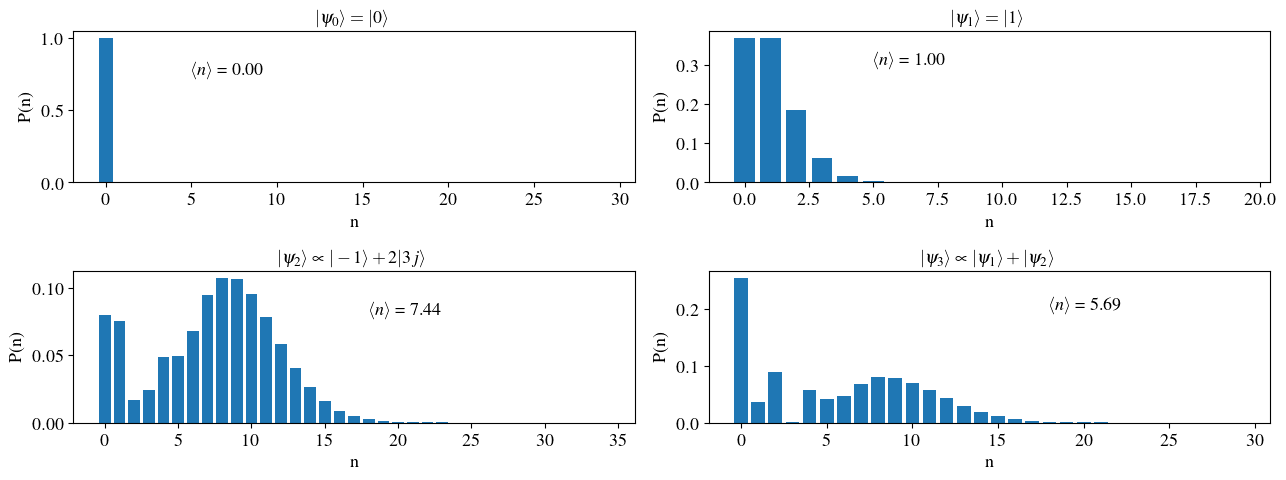

In [8]:
psi_0 = CoherentBasis(1,0)
psi_1 = CoherentBasis(1+0.7j,1)
psi_2 = CoherentBasis([1,2],[-1,3j])
psi_3 = psi_1 + psi_2

N_0,P_n0 = psi_0.PhotonNumber()                   # N_i = average photon number  (scalar)
N_1,P_n1 = psi_1.PhotonNumber(N_hilbert = 20)     # P_n = photon distribution as a funtion of n   (vector/list)
N_2,P_n2 = psi_2.PhotonNumber(N_hilbert = 35)     #
N_3,P_n3 = psi_3.PhotonNumber()                   #


# Plot the Photon distributions for states  |ψ_0⟩, |ψ_1⟩, |ψ_2⟩, |ψ_3⟩

# rc('font',**{'family':'serif','serif':['Times'],'size':13})
# rc('text', usetex=True)

f1 = plt.figure(1, figsize=(13,5), dpi = 100)

plt.subplot(2, 2, 1)
plt.bar(np.arange(len(P_n0)), P_n0[:,0], edgecolor='none')
plt.text(5, 0.75, f'$\\langle n \\rangle$ = {N_0:.2f}', fontsize=13)
plt.xlabel('n')
plt.ylabel('P(n)')
plt.title('$|\\psi_0\\rangle = |0\\rangle$', fontsize=13)

plt.subplot(2, 2, 2)
plt.bar(np.arange(len(P_n1)), P_n1[:,0], edgecolor='none')
plt.text(5, 0.3, f'$\\langle n \\rangle$ = {N_1:.2f}', fontsize=13)
plt.xlabel('n')
plt.ylabel('P(n)')
plt.title('$|\\psi_1\\rangle = |1\\rangle$', fontsize=13)

plt.subplot(2, 2, 3)
plt.bar(np.arange(len(P_n2)), P_n2[:,0], edgecolor='none')
plt.text(18, 0.08, f'$\\langle n \\rangle$ = {N_2:.2f}', fontsize=13)
plt.xlabel('n')
plt.ylabel('P(n)')
plt.title('$|\\psi_2\\rangle \\propto |-1\\rangle + 2|3j\\rangle$', fontsize=13)

plt.subplot(2, 2, 4)
plt.bar(np.arange(len(P_n3)), P_n3[:,0], edgecolor='none')
plt.text(18, 0.20, f'$\\langle n \\rangle$ = {N_3:.2f}', fontsize=13)
plt.xlabel('n')
plt.ylabel('P(n)')
plt.title('$|\\psi_3\\rangle \\propto |\\psi_1\\rangle + |\\psi_2\\rangle$', fontsize=13)

plt.tight_layout()



Here we introduce the annihilation $\hat{a}$ and creation $\hat{a}^\dagger$ operators.<br>
<br>
Recall that coherent states are eigenstates of $\hat{a}$, hence   $\hat{a}|\alpha\rangle = \alpha|\alpha\rangle$ <br>
Regarding the action of $\hat{a}^\dagger$ we will attack this problem by moving to Fock basis since $\hat{a}^\dagger|\alpha\rangle = \hat{a}^\dagger D(a)|0\rangle$. For more information on this see Phys. Rev. A 43, 492 ----  especially Eq. (2.9).

In [9]:

#  Annihilation (a) operator

psi_k = CoherentBasis(np.array([1. + 1.j]),np.array([-1.]))         # |psi_k> = (1 + 1j) |-1⟩
psi_k.normalize()
print("\n Consider the coherent state: ",psi_k.print_state('_k')[0],"\n")

# apply the anihillation operator "a"
psi_kk = psi_k.A()
print("\n |ψ_k'⟩ = a",psi_kk.print_state('_k')[0], "\n")
psi_kk.normalize()
print(" After normalizations ",psi_kk.print_state('_k`')[0],"\n")

print("\n The initial state  ",psi_k.print_state('_k')[0],"  remains unchanged ! \n\n")


print("\n Let's apply the annihilation operator to another state. \n")
print("",psi_3.print_state('_3')[0], "\n")
psi_33 = psi_3.A()
print("\n |ψ_3'⟩ = a|ψ_3⟩ = ",psi_33.print_state('')[1], "\n")
psi_33.normalize()
print("\n After normalizations ",psi_33.print_state('_3`')[0],)
print("                  ⟨ψ_3`|ψ_3`⟩ = ", lib.compact_complex(psi_33.braket()),"\n")


 Consider the coherent state:  |ψ_k⟩ = (0.707 + 0.707j) |-1⟩ 


 |ψ_k'⟩ = a |ψ_k⟩ = (-0.707 - 0.707j) |-1⟩ 

 After normalizations  |ψ_k`⟩ = (-0.707 - 0.707j) |-1⟩ 


 The initial state   |ψ_k⟩ = (0.707 + 0.707j) |-1⟩   remains unchanged ! 



 Let's apply the annihilation operator to another state. 

 |ψ_3⟩ = 1 |-1⟩  +  (1 + 0.7j) |1⟩  +  2 |3j⟩ 


 |ψ_3'⟩ = a|ψ_3⟩ =  -1 |-1⟩  +  (1 + 0.7j) |1⟩  +  6j |3j⟩ 


 After normalizations  |ψ_3`⟩ = -0.162 |-1⟩  +  (0.162 + 0.113j) |1⟩  +  0.971j |3j⟩
                  ⟨ψ_3`|ψ_3`⟩ =  1 



In [10]:
# Creation (a^†) operator

psi_k = CoherentBasis(np.array([1. + 1.j]),np.array([0]))         # |psi_k> = (1 + 1j) |0⟩
psi_k.normalize()
print("\n Consider the coherent state: ",psi_k.print_state('_k')[0],"\n")

psi_kk = psi_k.A_dagger()                                         # returns a FockBasis object !
print("\n |ψ_k`'⟩ = a^†|ψ_k⟩ = ",psi_kk.print_state('')[1], "\n")
psi_kk.normalize()                                                   
print("\n After normalizations ",psi_kk.print_state('_1`')[0],"      This is a FOCK state!!\n")
print(" The above behavior is expected since we acted with (a^†) on the vacuum |0⟩ (same in Coherent and Fock basis) which puts a photon and changes the state to |1⟩")
print(" However, in the more general case, when we act with (a^†) on a Coherent state we get an 'Agrawal state', for more see: Phys. Rev. A 43, 492 ----  especially Eq. (2.9).\n")

psi_k = CoherentBasis(np.array([1. + 1.j]),np.array([1]))         # |psi_1m> = (1 + 1j) |1⟩
psi_k.normalize()
print("\n Consider the coherent state: ",psi_k.print_state('_k')[0],"\n")

psi_kk = psi_k.A_dagger()                                         # returns a FockBasis object !
print("\n |ψ_k`⟩ = a^†|ψ_k⟩ = ",psi_kk.print_state('')[1], "\n")
psi_kk.normalize()                                                   
print("\n After normalizations ",psi_kk.print_state('_k`')[0])
print("                        ^")
print("                        ^ This is a FockBasis object !!\n")


 Consider the coherent state:  |ψ_k⟩ = (0.707 + 0.707j) |0⟩ 


 |ψ_k`'⟩ = a^†|ψ_k⟩ =  (0.707 + 0.707j) |1⟩ 


 After normalizations  |n_1`⟩ = (0.707 + 0.707j) |1⟩       This is a FOCK state!!

 The above behavior is expected since we acted with (a^†) on the vacuum |0⟩ (same in Coherent and Fock basis) which puts a photon and changes the state to |1⟩
 However, in the more general case, when we act with (a^†) on a Coherent state we get an 'Agrawal state', for more see: Phys. Rev. A 43, 492 ----  especially Eq. (2.9).


 Consider the coherent state:  |ψ_k⟩ = (0.707 + 0.707j) |1⟩ 


 |ψ_k`⟩ = a^†|ψ_k⟩ =  (0.429 + 0.429j) |1⟩  +  (0.607 + 0.607j) |2⟩  +  (0.525 + 0.525j) |3⟩  +  (0.35 + 0.35j) |4⟩  +  (0.196 + 0.196j) |5⟩  +  (0.0959 + 0.0959j) |6⟩  +  (0.0423 + 0.0423j) |7⟩  +  (0.0171 + 0.0171j) |8⟩  +  (0.00641 + 0.00641j) |9⟩  +  (0.00225 + 0.00225j) |10⟩  +  (0.000747 + 0.000747j) |11⟩  +  (0.000235 + 0.000235j) |12⟩  +  (7.07e-05 + 7.07e-05j) |13⟩  +  (2.03e-05 + 2.03e-05j) |14⟩  +  

Let's compute the Wigner functions for: <br>
(i) vacuum $|0\rangle$, <br>
(ii) coherent $|\alpha\rangle$,  <br>
(iii) superposition of two coherent states $|\alpha\rangle + |\beta\rangle$ <br>


 Let's calculate the integral of all three Wigner functions. The closer to unity, the better.


 ∫∫ W_[even] dada* = 1.00000


 ∫∫ W_[odd] dada* = 1.00000


 ∫∫ W_[compass] dada* = 1.00000



Text(0.5, 0.8, 'Wigner functions')

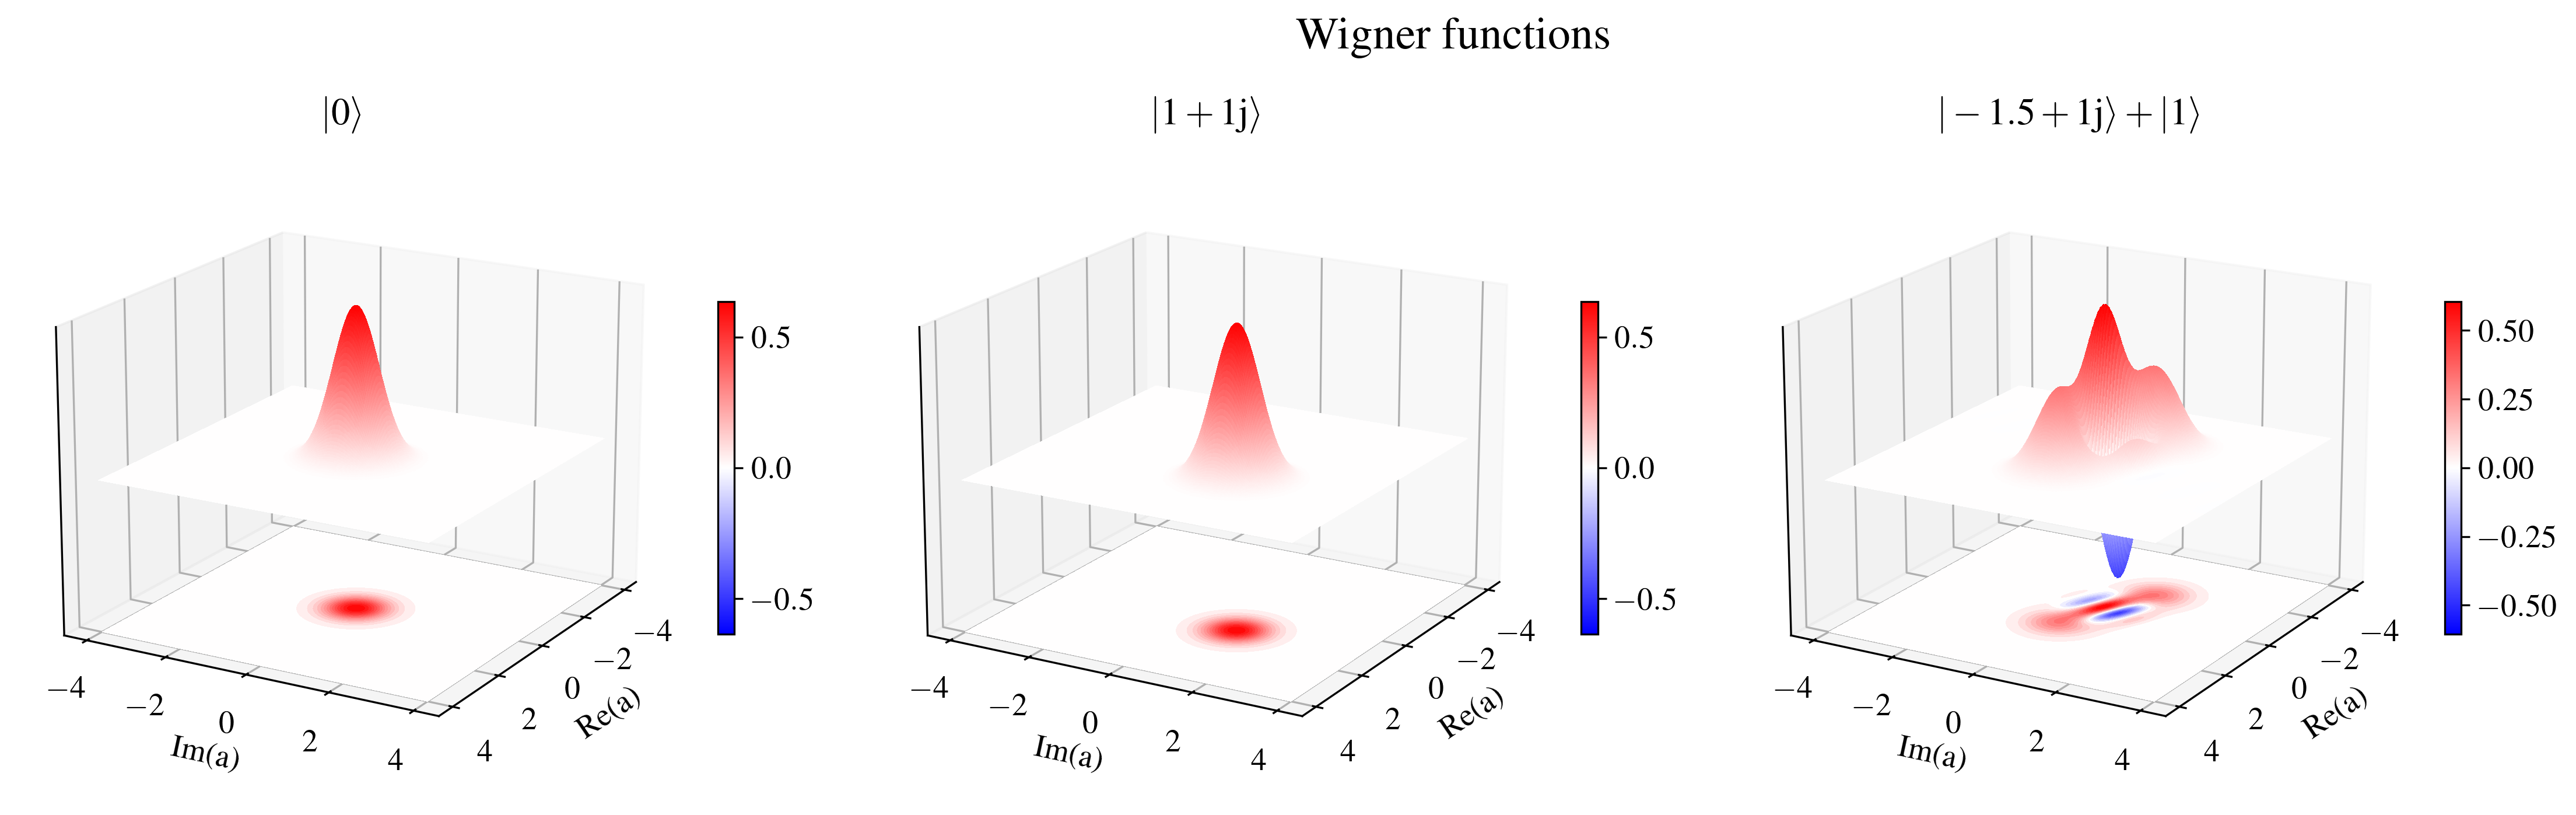

In [22]:
vac      = CoherentBasis(1,0)                                                                      # ~ |0⟩  
alpha    = CoherentBasis(1j+0.4,1+1j)                                                              # ~ |1+1j⟩  
a_plus_b = CoherentBasis(np.array([1,1]).reshape(-1,1),np.array([-1.5 + 1j,1]).reshape(-1,1))      # ~ |-1.5 +1j⟩ + |1⟩     

vac.normalize()
alpha.normalize()
a_plus_b.normalize()

# Compute Wigner function and calculate its integral
#
# Create the mesh for Wigner function
x_max = 4                                           # square side 
N     = 250                                         # number of points across each direction
x     = np.linspace(-x_max, x_max, N)               #
y     = x
X, Y  = np.meshgrid(x, y)                           # create the mesh
dxdy = (X[0, 1] - X[0, 0]) * (Y[1, 0] - Y[0, 0])    # area differential

W_vac = vac.WignerFunction(x_max=x_max,Nx=N,y_max=x_max,Ny=N)
W_alpha = alpha.WignerFunction(x_max=x_max,Nx=N,y_max=x_max,Ny=N)
W_a_b = a_plus_b.WignerFunction(x_max=x_max,Nx=N,y_max=x_max,Ny=N)


# Here we do a simple consistency check
#
print("\n Let's calculate the integral of all three Wigner functions. The closer to unity, the better.\n")
print('\n ∫∫ W_[even] dada* = {:.5f}\n'.format(np.real(np.sum(W_vac))*dxdy))
print('\n ∫∫ W_[odd] dada* = {:.5f}\n'.format(np.real(np.sum(W_alpha))*dxdy))
print('\n ∫∫ W_[compass] dada* = {:.5f}\n'.format(np.real(np.sum(W_a_b))*dxdy))




f3, ax = plt.subplots(1, 3,subplot_kw={"projection": "3d"},figsize=(15,8), dpi = 300)

W = [W_vac, W_alpha, W_a_b]                     # list with the previously calculated Wigner functions

fig_titls = ['$|0\\rangle$', '$|1+1{\\rm j}\\rangle$', '$|-1.5 + 1{\\rm j}\\rangle + |1\\rangle$']     # titles for the plots

for ii in range(ax.shape[0]):
    surf = ax[ii].plot_surface(X, Y, np.real(W[ii]), cmap=cm.bwr, linewidth=0, antialiased=False, rcount=N, ccount=N,             # 3D surface plot
                               vmin = -np.abs(W[ii].max()), vmax = np.abs(W[ii].max()) )

    ax[ii].set_zlim(-np.abs(W[ii].max()), np.abs(W[ii].max()))      # Customize the z axis.
    ax[ii].set_zticks([])
    f3.colorbar(surf, ax=ax[ii], shrink = 0.25, location='right')   # Add a color bar which maps values to colors.

    m    = (np.abs(W[ii])).max()                                    # Create a 2D projection of the surface at the bottom
    lvls = np.linspace(-m,m,30)
    ax[ii].contourf(X, Y, np.real(W[ii]), levels = lvls ,zdir='z', offset=-np.real(W[ii]).max(), cmap=cm.bwr,                         # 2D surface plot at the bottom plane
                                  vmin = -np.abs(W[ii].max()), vmax = np.abs(W[ii].max()))

    # Set labels and title
    ax[ii].set_xlabel('Re(a)')
    ax[ii].set_ylabel('Im(a)')
    ax[ii].set_title(fig_titls[ii])
    ax[ii].view_init(elev=18, azim=30)

f3.tight_layout()
plt.figtext(0.5, 0.8, 'Wigner functions',fontsize = 'x-large')



Now it's about time to define the so called "Cat states" : <br>
- Symmetric or Even cat $|\mathcal{C}_+\rangle = \mathcal{N}(|\alpha\rangle + |-\alpha\rangle)$, <br> 
- Antisymmetric or Odd cat $|\mathcal{C}_-\rangle = \mathcal{N}(|\alpha\rangle - |-\alpha\rangle)$ <br>
- Compass cat : $|\mathcal{C}_c\rangle = \mathcal{N}_c(|\alpha\rangle + |-\alpha\rangle + |\alpha \cdot {\rm j}\rangle + |-\alpha\cdot {\rm j}\rangle)$

Then we plot the photon number distribution, and later on the Wigner quasi-distribution and the Q-Husimi function

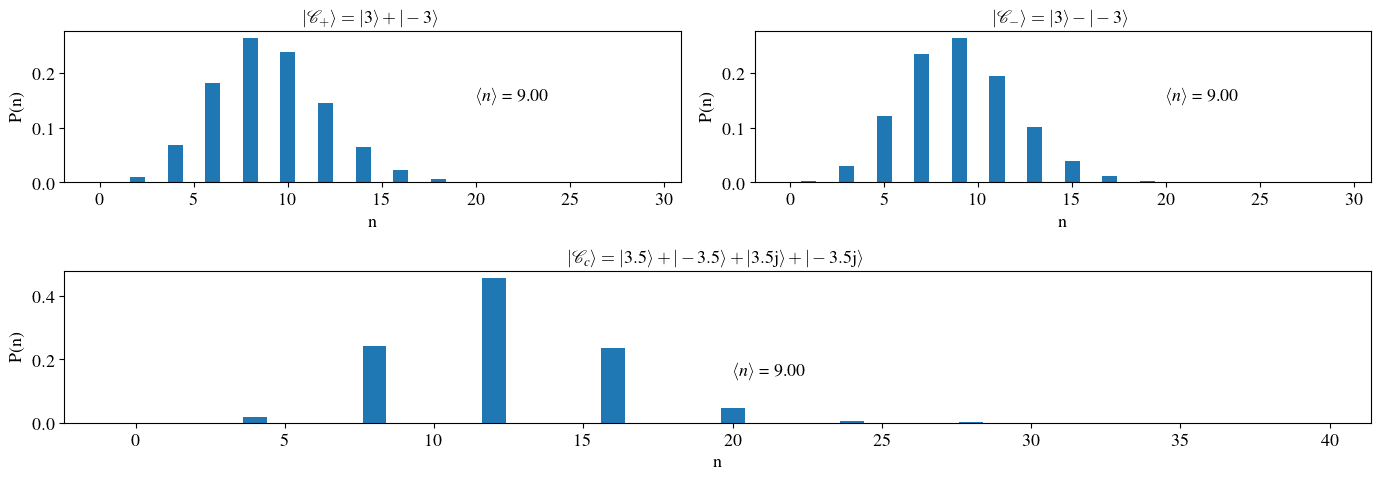

In [12]:
# Define the so called  Cat states ! -----------------------------------------------------------------------------------

c    = np.array([[1.0],[1.0]])                    # coefficient in front of the  ·| ⟩
s    = np.array([[3.0],[-3.0]])                   # argument inside the |·⟩
psi_even_cat    = CoherentBasis(c,s)              # create an EVEN cat state = |a⟩ + |-a⟩,  a = complex

c    = np.array([[1.0],[-1.0]])                   # coefficient in front of the | ⟩
psi_odd_cat     = CoherentBasis(c,s)              # create an ODD cat state = |a⟩ - |-a⟩,  a = complex

# define the compass cat state
c            = np.array([[1.0],[1.0],[1.0],[1.0]])            # coefficient in front of the \ket
s            = np.array([[3.5],[-3.5],[3.5j],[-3.5j]])
psi_compass  = CoherentBasis(c,s)

psi_even_cat.normalize()                          # normalize the states
psi_odd_cat.normalize()                           #
psi_compass.normalize()


# Photon number
N_even, P_neven = psi_even_cat.PhotonNumber()        # N_i = average photon number,  i = {even,odd}
N_odd,  P_nodd  = psi_odd_cat.PhotonNumber()         # P_n = photon distribution as a funtion of n
N_com,  P_ncom  = psi_compass.PhotonNumber(N_hilbert = 40)          #

# rc('font',**{'family':'serif','serif':['Times'],'size':13})
# rc('text', usetex=True)


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 5), gridspec_kw={'height_ratios': [1, 1], 'width_ratios': [1, 1]})
gs = ax[0, 0].get_gridspec()

# Remove the last two axes that will be replaced with a single one
for a in ax[1, :]:
    a.remove()

# Create a new axis that spans both columns in the second row
axbig = fig.add_subplot(gs[1, :])

ax[0,0].bar(np.arange(len(P_neven)), P_neven[:,0], edgecolor='none')
ax[0,0].text(20, 0.15, f'$\\langle n \\rangle$ = {N_even:.2f}', fontsize=13)
ax[0,0].set_xlabel('n')
ax[0,0].set_ylabel('P(n)')
ax[0,0].set_title('$|\\mathcal{C}_{+}\\rangle =  |3\\rangle + |-3\\rangle $', fontsize=13)

ax[0,1].bar(np.arange(len(P_neven)), P_nodd[:,0], edgecolor='none')
ax[0,1].text(20, 0.15, f'$\\langle n \\rangle$ = {N_odd:.2f}', fontsize=13)
ax[0,1].set_xlabel('n')
ax[0,1].set_ylabel('P(n)')
ax[0,1].set_title('$|\\mathcal{C}_{-}\\rangle =  |3\\rangle - |-3\\rangle $', fontsize=13)

# Plot the third bar chart spanning both columns in the second row
axbig.bar(np.arange(len(P_ncom)), P_ncom[:,0], edgecolor='none')
axbig.text(20, 0.15, f'$\\langle n \\rangle$ = {N_odd:.2f}', fontsize=13)
axbig.set_xlabel('n')
axbig.set_ylabel('P(n)')
axbig.set_title('$|\\mathcal{C}_{c}\\rangle =  |3.5\\rangle + |-3.5\\rangle + |3.5{\\rm j}\\rangle + |-3.5{\\rm j}\\rangle $', fontsize=13)

plt.tight_layout()
plt.show()

In [13]:
# Compute Wigner function and calculate its integral
#
# Create the mesh for Wigner function
x_max = 6                                           # square side 
N     = 500                                         # number of points across each direction
x     = np.linspace(-x_max, x_max, N)               #
y     = x
X, Y  = np.meshgrid(x, y)                           # create the mesh
dxdy = (X[0, 1] - X[0, 0]) * (Y[1, 0] - Y[0, 0])    # area differential


W_even    = psi_even_cat.WignerFunction(x_max,N)    # Compute Wigner function
W_odd     = psi_odd_cat.WignerFunction(x_max,N)     #
W_compass = psi_compass.WignerFunction(x_max,N)     #

# Here we do a simple consistency check
#
print("\n Let's calculate the integral of all three Wigner functions. The closer to unity, the better.\n")
print('\n ∫∫ W_[even] dada* = {:.5f}\n'.format(np.real(np.sum(W_even))*dxdy))
print('\n ∫∫ W_[odd] dada* = {:.5f}\n'.format(np.real(np.sum(W_odd))*dxdy))
print('\n ∫∫ W_[compass] dada* = {:.5f}\n'.format(np.real(np.sum(W_compass))*dxdy))



 Let's calculate the integral of all three Wigner functions. The closer to unity, the better.


 ∫∫ W_[even] dada* = 1.00000


 ∫∫ W_[odd] dada* = 1.00000


 ∫∫ W_[compass] dada* = 1.00000



Text(0.5, 0.8, 'Wigner functions')

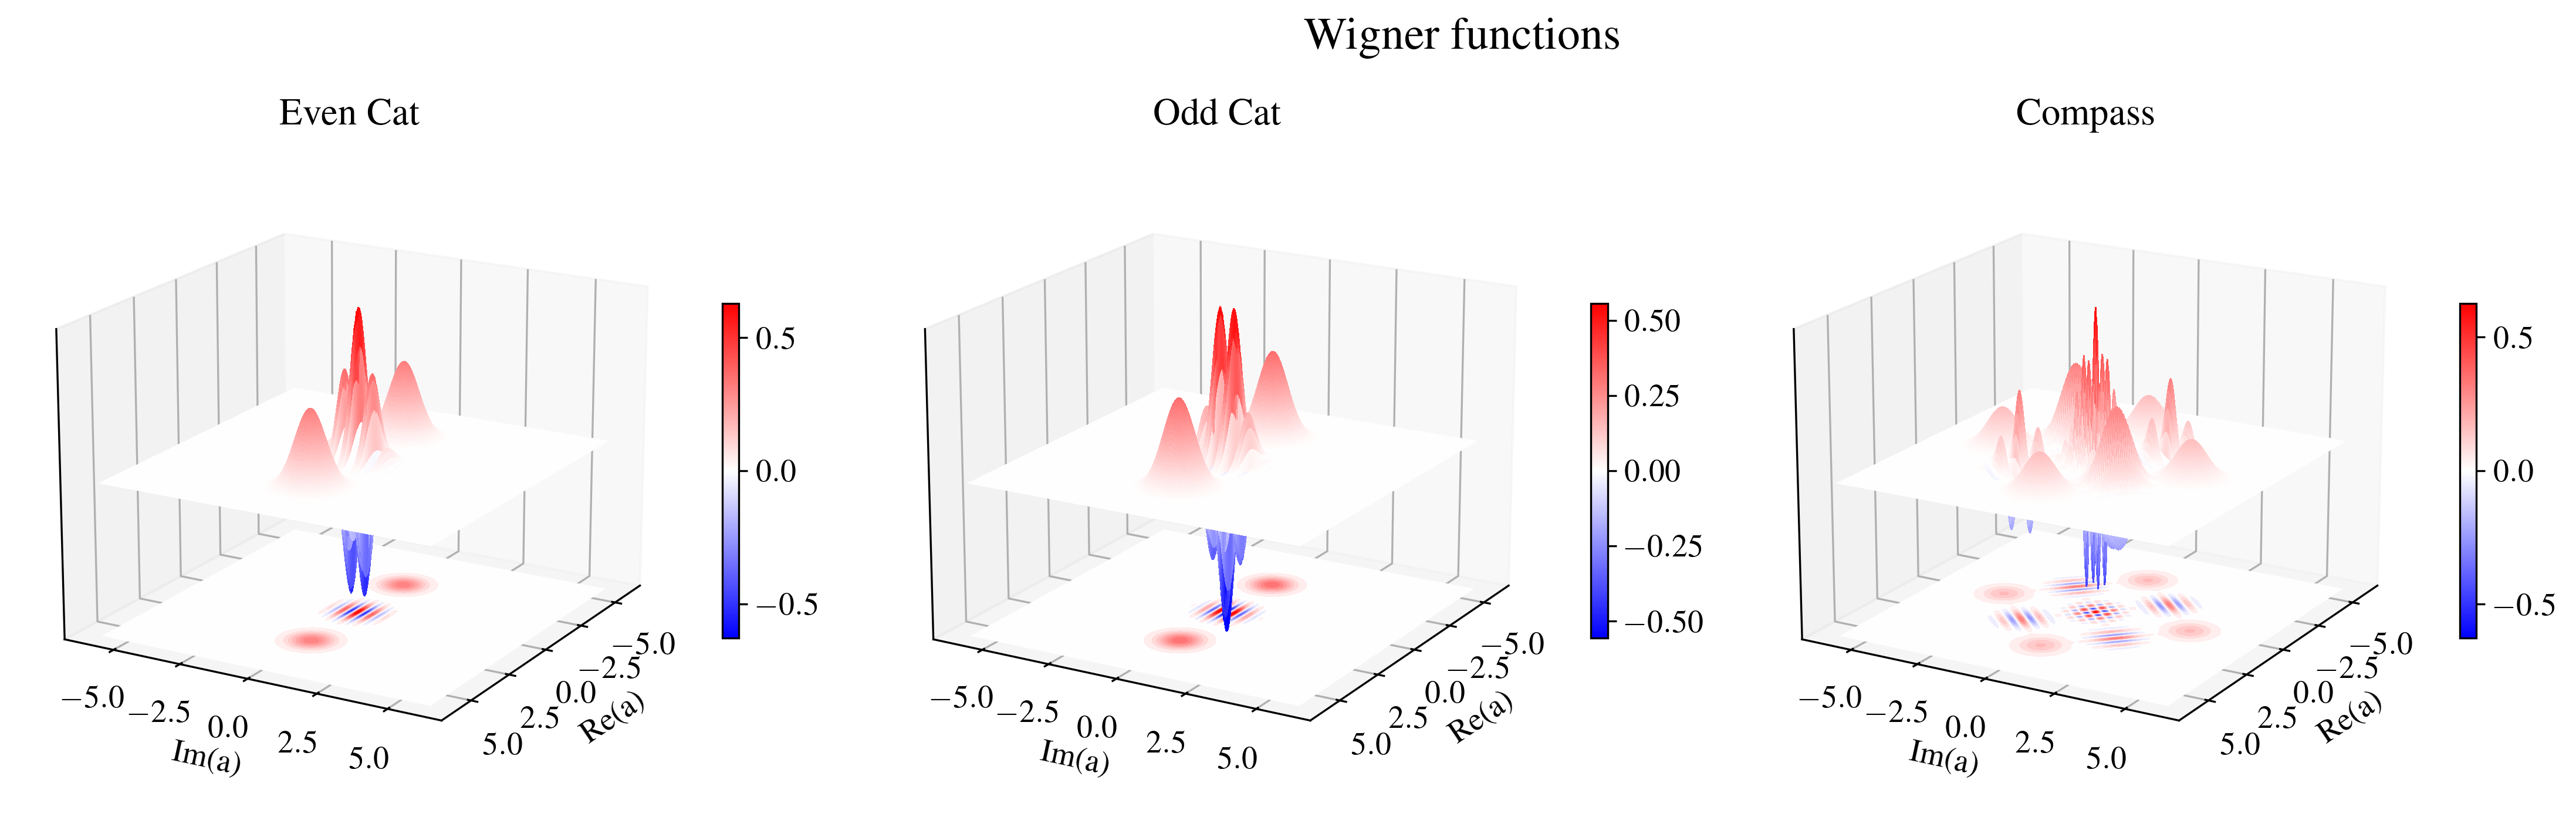

In [14]:
# Plot Wigner Functions 

f3, ax = plt.subplots(1, 3,subplot_kw={"projection": "3d"},figsize=(15,8), dpi = 300)

W = [W_even, W_odd, W_compass]                     # list with the previously calculated Wigner functions

fig_titls = ['Even Cat', 'Odd Cat', 'Compass']     # titles for the plots

for ii in range(ax.shape[0]):
    surf = ax[ii].plot_surface(X, Y, np.real(W[ii]), cmap=cm.bwr, linewidth=0, antialiased=False, rcount=400, ccount=400,             # 3D surface plot
                               vmin = -np.abs(W[ii].max()), vmax = np.abs(W[ii].max()) )

    ax[ii].set_zlim(-np.abs(W[ii].max()), np.abs(W[ii].max()))      # Customize the z axis.
    ax[ii].set_zticks([])
    f3.colorbar(surf, ax=ax[ii], shrink = 0.25, location='right')   # Add a color bar which maps values to colors.

    m    = (np.abs(W[ii])).max()                                    # Create a 2D projection of the surface at the bottom
    lvls = np.linspace(-m,m,30)
    ax[ii].contourf(X, Y, np.real(W[ii]), levels = lvls ,zdir='z', offset=-np.real(W[ii]).max(), cmap=cm.bwr,                         # 2D surface plot at the bottom plane
                                  vmin = -np.abs(W[ii].max()), vmax = np.abs(W[ii].max()))

    # Set labels and title
    ax[ii].set_xlabel('Re(a)')
    ax[ii].set_ylabel('Im(a)')
    ax[ii].set_title(fig_titls[ii])
    ax[ii].view_init(elev=18, azim=30)

f3.tight_layout()
plt.figtext(0.5, 0.8, 'Wigner functions',fontsize = 'x-large')



Text(0.5, 0.8, 'Wigner functions')

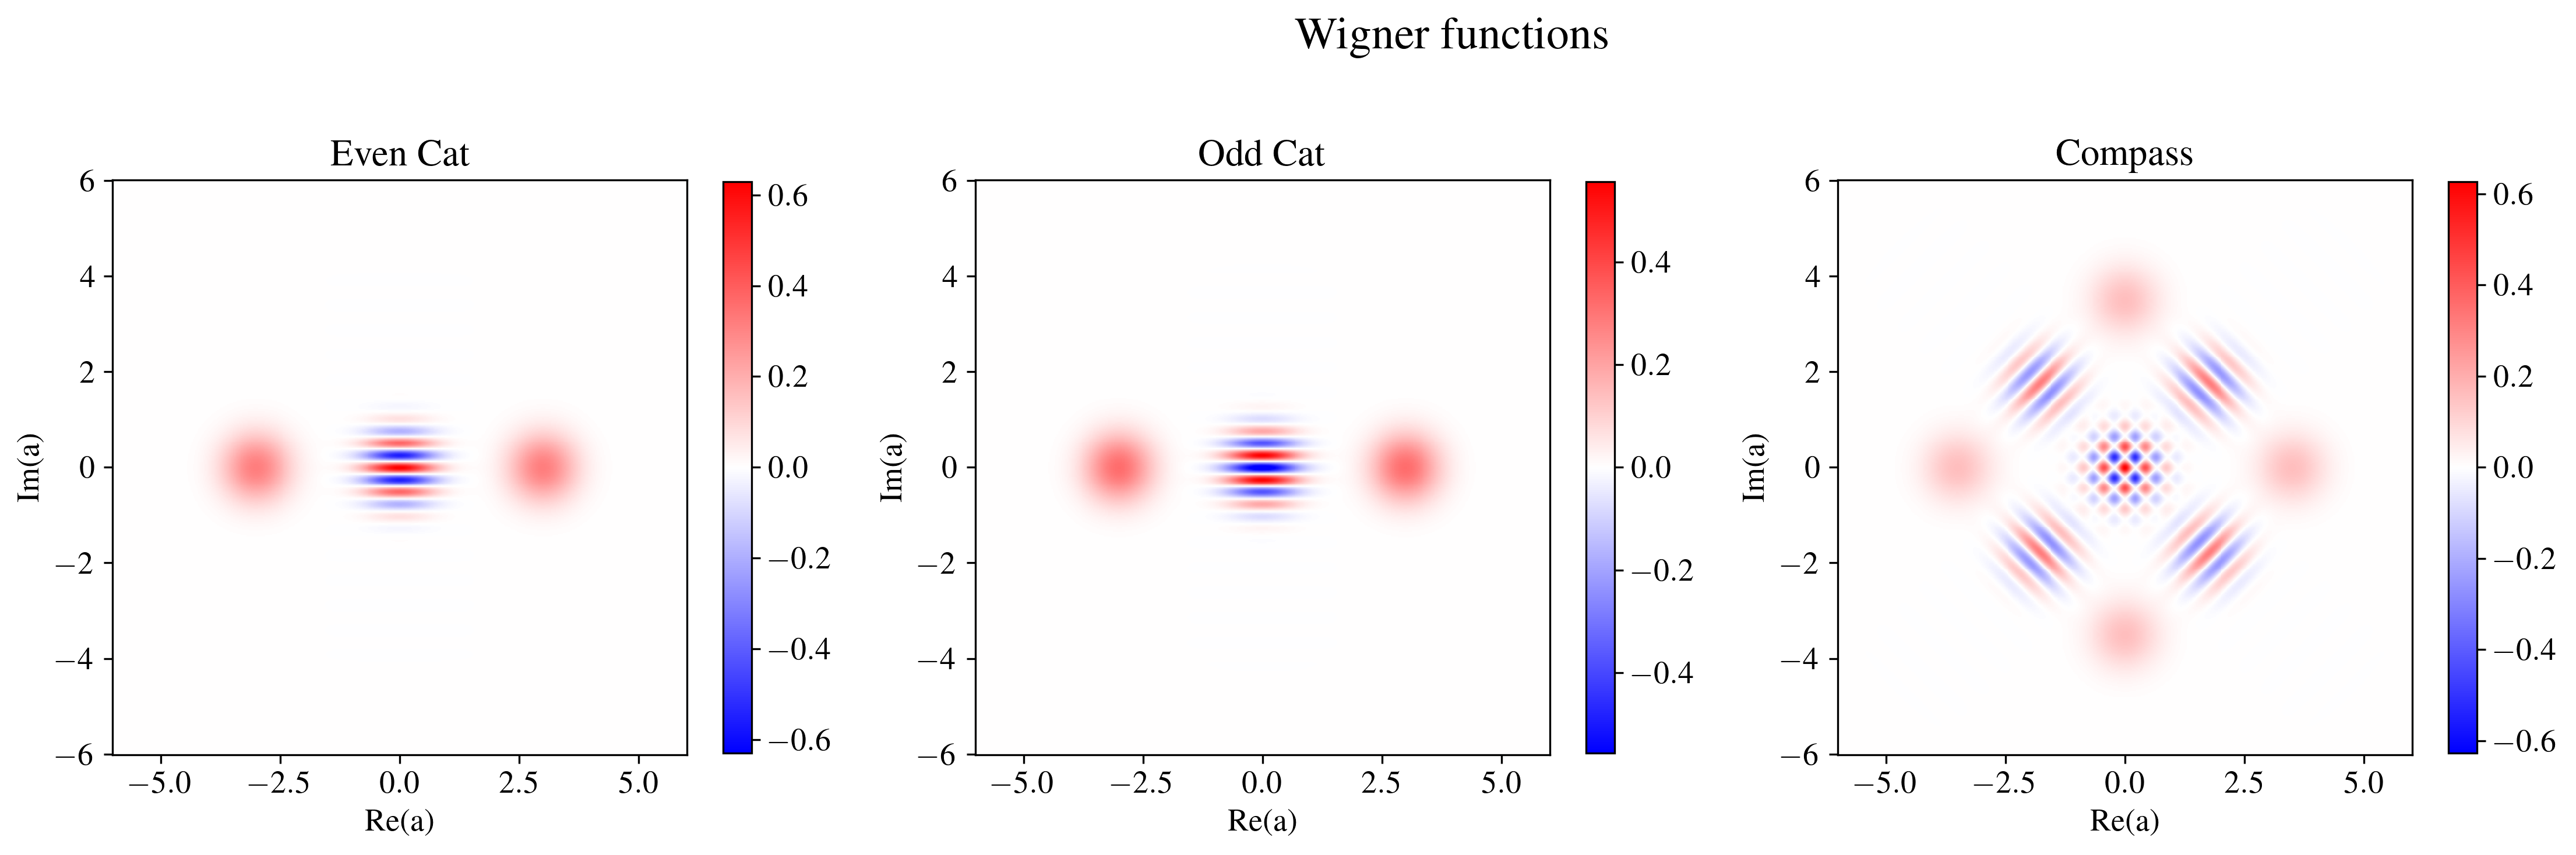

In [15]:
# Calculate Wigner functions - Top view

f4, ax = plt.subplots(nrows=1, ncols=3,figsize=(15,8), dpi = 300)

fig_titls = ['Even Cat', 'Odd Cat', 'Compass']

for ii in range(ax.shape[0]):
   surf = ax[ii].pcolor(X,Y,np.real(W[ii]),cmap=cm.bwr,antialiased=False, vmin = -np.abs(W[ii].max()), vmax = np.abs(W[ii].max()) )
   ax[ii].set_aspect('equal', adjustable='box')
   f4.colorbar(surf, ax=ax[ii], shrink=0.43, location='right') 
   ax[ii].set_title(fig_titls[ii])
   ax[ii].set_xlabel('Re(a)')
   ax[ii].set_ylabel('Im(a)')

# Uncomment to zoom in 
# 
# ax[0].set_xlim([-4.5, 4.5])
# ax[0].set_ylim([-2, 2])
# f4.colorbar(surf, ax=ax[0], shrink=0.19, location='right') 
# ax[1].set_xlim([-4.5, 4.5])
# ax[1].set_ylim([-2, 2])
# f4.colorbar(surf, ax=ax[1], shrink=0.19, location='right') 
# ax[2].set_xlim([-5, 5])
# ax[2].set_ylim([-5, 5])
# f4.colorbar(surf, ax=ax[2], shrink=0.43, location='right') 

f4.tight_layout()
plt.figtext(0.5, 0.8, 'Wigner functions',fontsize = 'x-large')

We do the same for the Q-Husimi functions

In [16]:
# Compute Q-Husimi function and calculate its integral 
Q_even_cat = psi_even_cat.Q_function(x_max, N)      # compute the Q function,  Q is an NxN matrix
Q_odd_cat  = psi_odd_cat.Q_function(x_max, N)       #
Q_compass  = psi_compass.Q_function(x_max, N)       #

# Here we do a simply consistency check
#
print("\n Let's calculate the integral of all three Husimi functions. The closer to unity, the better.\n")
check_Q = np.sum(np.sum(Q_even_cat)) * dxdy                  # integral of Q dA = 1    (this is a must)
print("\n ∫∫ Q_[even] dβdβ* = {:.3f}".format(check_Q),"\n")
check_Q = np.sum(np.sum(Q_odd_cat)) * dxdy                   # integral of Q dA = 1    (this is a must)
print("\n ∫∫ Q_[odd] dβdβ* = {:.3f}".format(check_Q),"\n")
check_Q = np.sum(np.sum(Q_compass)) * dxdy                   # integral of Q dA = 1    (this is a must)
print("\n ∫∫ Q_[compass] dβdβ* = {:.3f}".format(check_Q),"\n")


 Let's calculate the integral of all three Husimi functions. The closer to unity, the better.


 ∫∫ Q_[even] dβdβ* = 1.000 


 ∫∫ Q_[odd] dβdβ* = 1.000 


 ∫∫ Q_[compass] dβdβ* = 1.000 



Text(0.5, 0.8, 'Q-Husimi functions')

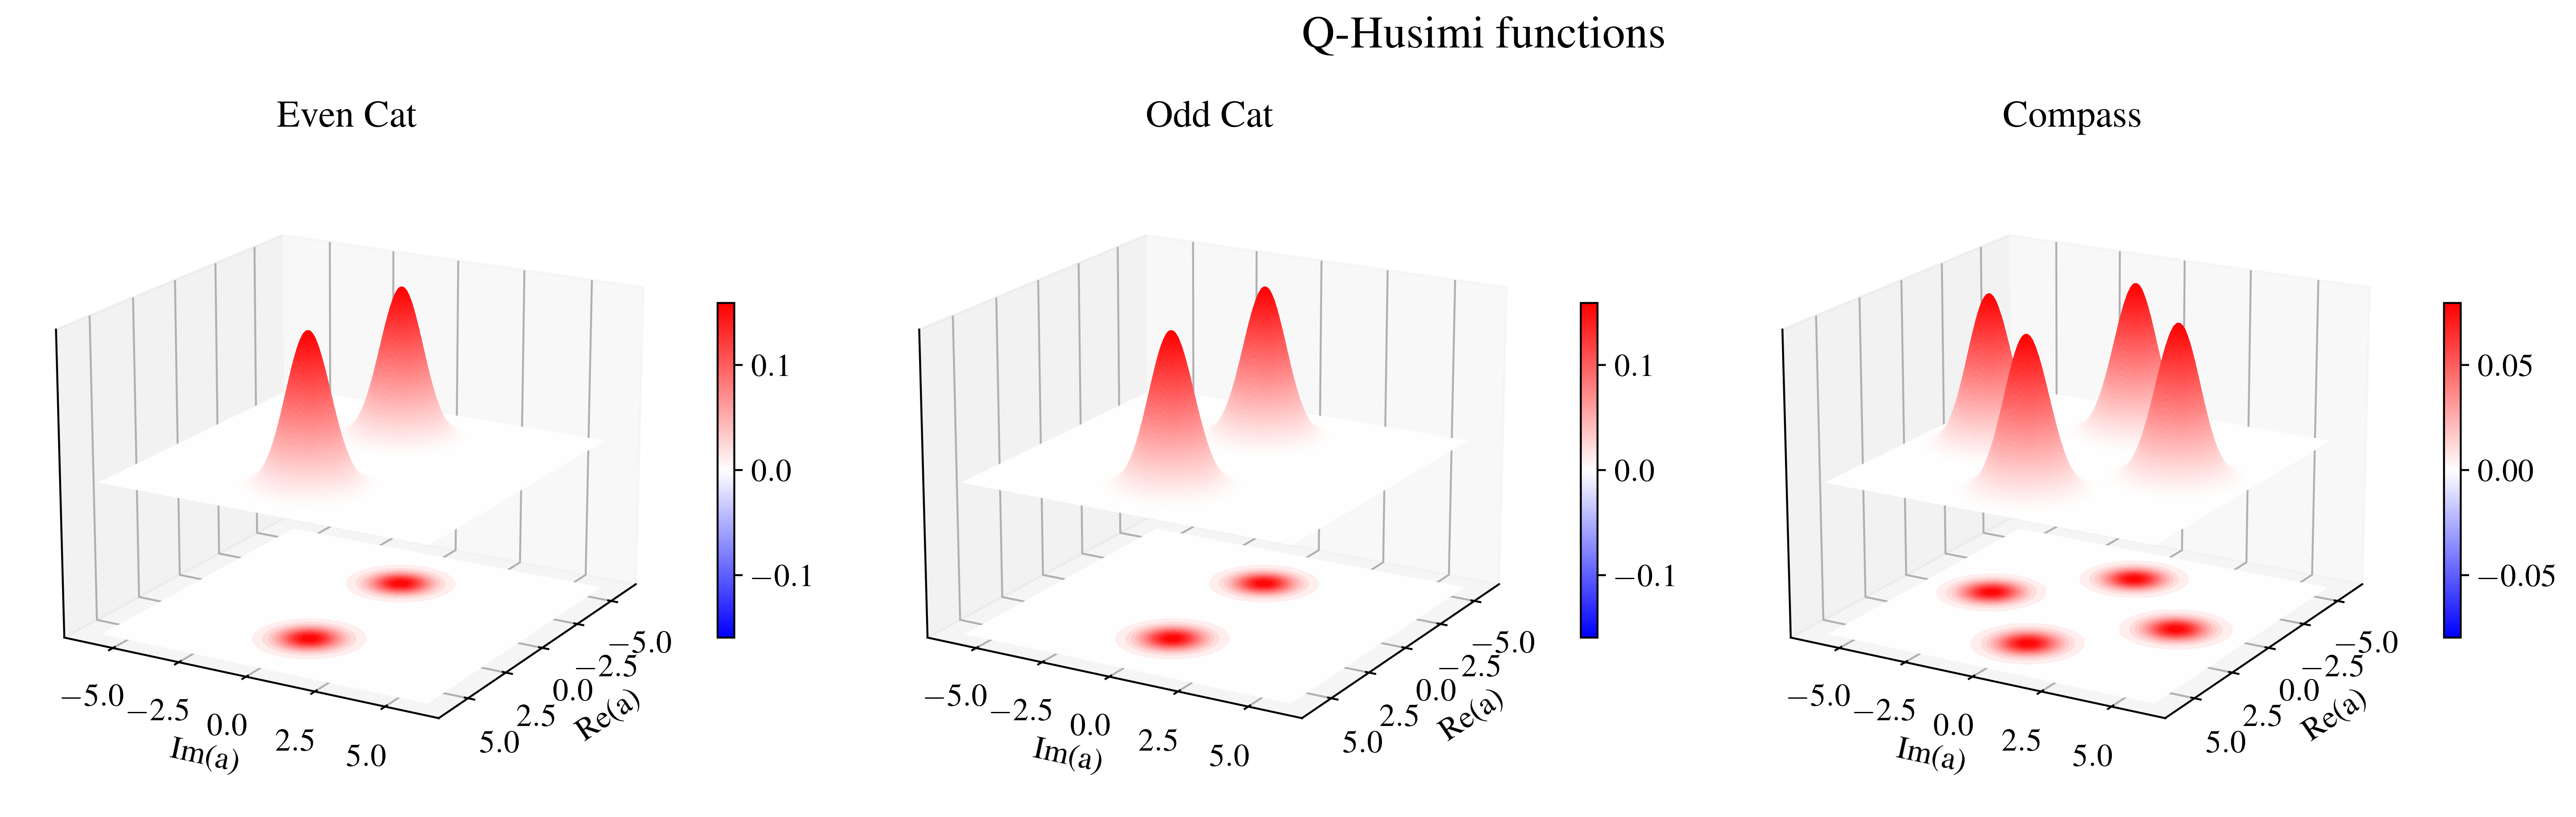

In [17]:
# Plot Q Functions 

f5, ax = plt.subplots(1, 3,subplot_kw={"projection": "3d"},figsize=(15,8), dpi = 400)

Q = [Q_even_cat, Q_odd_cat, Q_compass]

fig_titls = ['Even Cat', 'Odd Cat', 'Compass']
for ii in range(ax.shape[0]):
    surf = ax[ii].plot_surface(X, Y, np.real(Q[ii]), cmap=cm.bwr, linewidth=0, antialiased=False, rcount=N/2, ccount=N/2,
                               vmin = -np.abs(Q[ii].max()), vmax = np.abs(Q[ii].max()) )

    ax[ii].set_zlim(-np.abs(Q[ii].max()), np.abs(Q[ii].max()))      # Customize the z axis.
    ax[ii].set_zticks([])
    f5.colorbar(surf, ax=ax[ii], shrink = 0.25, location='right')  # Add a color bar which maps values to colors.

    m      = (np.abs(Q[ii])).max()                                  # Create a 2D projection of the surface at the bottom
    lvls = np.linspace(-m,m,30)
    ax[ii].contourf(X, Y, np.real(Q[ii]), levels = lvls ,zdir='z', offset=-Q[ii].max(), cmap=cm.bwr,
                                  vmin = -np.abs(Q[ii].max()), vmax = np.abs(Q[ii].max()))

    # Set labels and title
    ax[ii].set_xlabel('Re(a)')
    ax[ii].set_ylabel('Im(a)')
    ax[ii].set_title(fig_titls[ii])
    ax[ii].view_init(elev=18, azim=30)
f5.tight_layout()
plt.figtext(0.5, 0.8, 'Q-Husimi functions',fontsize = 'x-large')




Text(0.5, 0.75, 'Q-Husimi functions')

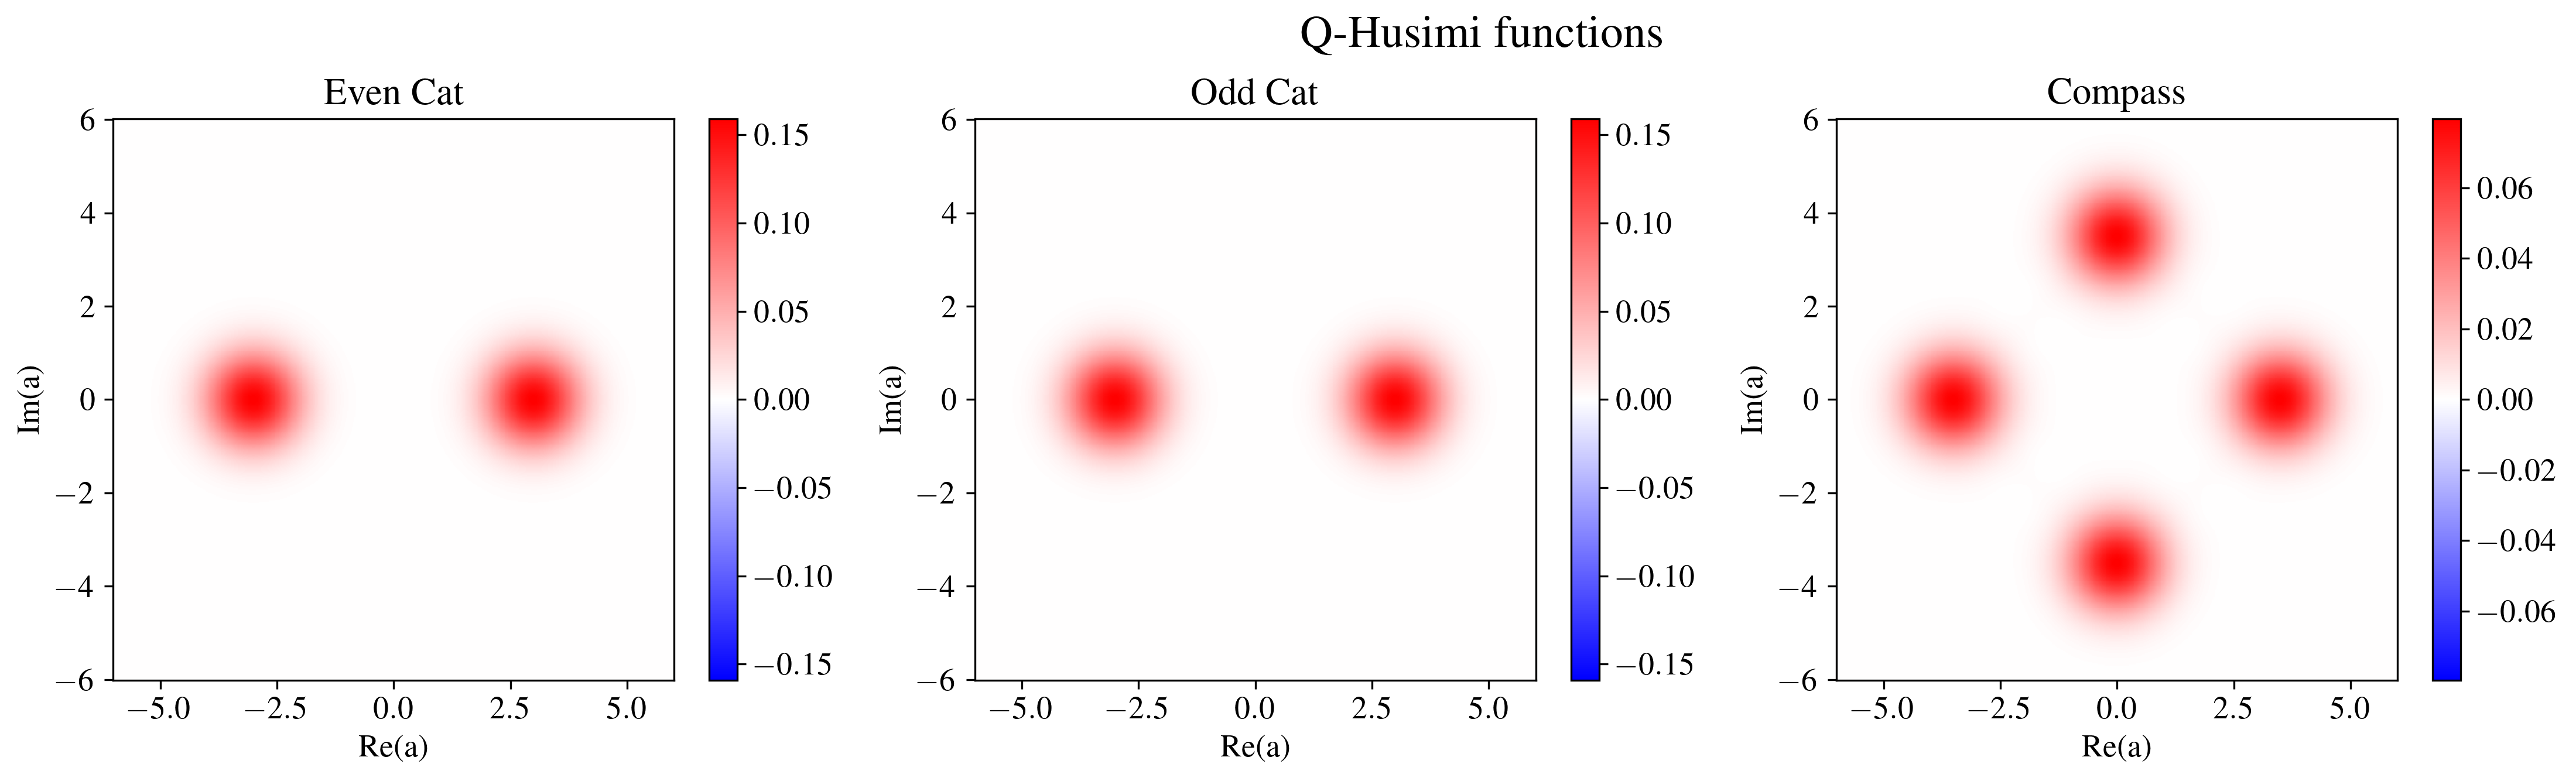

In [18]:
# Calculate Q functions - Top view

f6, ax = plt.subplots(nrows=1, ncols=3,figsize=(15,8), dpi=300)

fig_titls = ['Even Cat', 'Odd Cat', 'Compass']

for ii in range(ax.shape[0]):
   surf = ax[ii].pcolor(X,Y,np.real(Q[ii]),cmap=cm.bwr,antialiased=False, vmin = -np.abs(Q[ii].max()), vmax = np.abs(Q[ii].max()) )
   ax[ii].set_aspect('equal', adjustable='box')
   f6.colorbar(surf, ax=ax[ii], shrink=0.42, location='right') 
   ax[ii].set_title(fig_titls[ii])
   ax[ii].set_xlabel('Re(a)')
   ax[ii].set_ylabel('Im(a)')
f6.tight_layout()
plt.figtext(0.5, 0.75, 'Q-Husimi functions',fontsize = 'x-large')